In [ ]:
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib

import cv2
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np


In [52]:
# Machine learning packages
import utils.classifier_utils as clf_util

from sklearn.linear_model import LogisticRegression
#from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [3]:
# Load in data
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


### Preprocessing

In [55]:
# Grayscale

'''
First, I create an empty array with the same shape of X_train and X_test. Afterwards, I will loop through each image one
by one (specified by X_train/X_test.shape[0], that represents the number of images in the given numpy array) and convert
each of them to grayscale using cv2.cvtColor(). The resulting grayscale image will then be appended to the initialized
empty array.

'''
# Convert X_train to grayscale
X_train_greyed = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
for i in range(X_train.shape[0]):
    X_train_greyed[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
    
# Convert X_test to grayscale
X_test_greyed = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))
for i in range(X_test.shape[0]):
    X_test_greyed[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)

In [56]:
# Scaling the features

X_train_scaled = X_train_greyed/255.0
X_test_scaled = X_test_greyed/255.0

In [57]:
# Reshape to 2D (number of images, number of pixels for each flattened image)

X_train_scaled_reshape = X_train_scaled.reshape(-1, 1024)   # (50000, 1024)
X_test_scaled_reshape = X_test_scaled.reshape(-1, 1024)     # (10000, 1024)

In [ ]:
### ??????
# Add label names
# You'll need to make a list of labels based on the object names - you can find these on the website.

for label in enumerate(y_train, y_test):
    label_name[0] == 'airplane',
    label_name[1] == 'automobile',
    
modality_label = ['airplane', 'automobile', 'bird', 'cat', 'deer']

for label in modality_label:
    label_name[label] = epochs[label][event_data[label][:, 2] == 0]
    label_name[label] = epochs[label][event_data[label][:, 2] == 1]
    label_name[label] = epochs[label][event_data[label][:, 2] == 2]

#####

In [31]:
# Logistic Regression classifier!!!

LR_classifier = LogisticRegression(tol = 0.1,
                         solver = 'saga',
                         multi_class = 'multinomial').fit(X_train_scaled_reshape, y_train)


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
# Predicting labels for new, unseen data using the trained classifier
y_pred = LR_classifier.predict(X_test_scaled_reshape)

# Printing the predicted labels for the first 10 samples
print(y_pred[:100])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [50]:
y_pred = clf.predict(X_test_scaled_reshape)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.1


/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      1.00      0.18      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



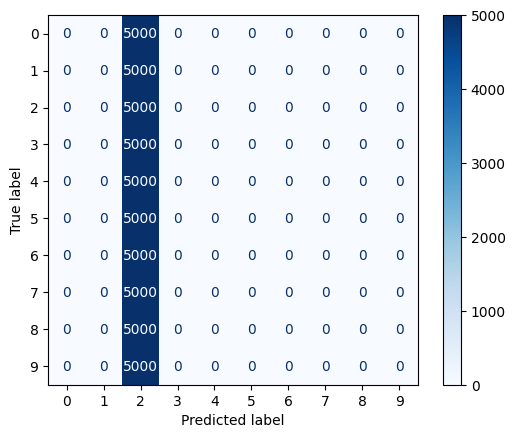

In [37]:
metrics.ConfusionMatrixDisplay.from_estimator(LR_classifier,
                                            X_train_scaled_reshape,
                                            y_train,
                                            cmap = plt.cm.Blues)

classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)